In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [55]:
df = pd.read_csv('resources\websites_full.csv').drop(columns=['ID'])
df

,url,exclamation_count,words_to_avoid_count,smart_words_count,h1_count,h2_count,div_count,iframe_count,a_count,img_count,...,ylt_cssDuplicatedProperties,ylt_totalWeight,ylt_domains,ylt_compression,ylt_totalRequests,ylt_heavyFonts,ylt_global_score,ylt_badJavascript_score,ylt_jQuery_score,ylt_serverConfig_score
0,https://edition.cnn.com/2021/09/06/asia/taliba...,13,15,14,1,1,387,4,275,5,...,479,3402031,39,458049,138,36064,13,97,70,40
1,https://edition.cnn.com/2021/09/06/americas/co...,4,11,0,1,0,210,3,253,7,...,479,3548487,39,458831,134,41216,19,97,70,42
2,https://edition.cnn.com/2021/09/06/entertainme...,8,9,14,1,2,401,4,271,6,...,587,4748839,41,598947,163,54200,22,97,70,35
3,https://edition.cnn.com/2021/09/06/world/perse...,11,11,4,1,1,295,3,256,14,...,542,3988747,42,594764,156,36064,14,97,70,33
4,https://www.bbc.com/news/av/world-asia-india-5...,10,2,1,1,4,246,1,104,15,...,16,1275281,17,49244,56,134516,82,100,100,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,https://americasfreedomfighters.com/fda-makes/,153,22,2,3,8,192,20,124,37,...,119,3506248,56,169485,263,25664,17,20,-200,20
331,https://americasfreedomfighters.com/man-has-to...,113,18,0,3,2,192,21,113,37,...,127,4411248,63,240498,279,25664,11,20,-200,21
332,https://americasfreedomfighters.com/texas-they...,140,3,6,4,2,195,20,114,37,...,119,3675811,57,237474,263,25664,17,20,-200,21
333,https://americasfreedomfighters.com/breaking-w...,109,10,1,3,2,192,18,118,37,...,118,4124108,62,283038,283,25664,17,20,-200,11


In [56]:
fake = pd.read_csv('resources/training_data/not_that_legit.txt', names=["name"])
true = pd.read_csv('resources/training_data/legit.txt', names=["name"])
fake['label'] = 1
true['label'] = 0
fake = fake.append(true)
fake = fake.sort_values(by=['name'], ignore_index=True)
fake = fake.iloc[21:].reset_index()
labels = fake['label']
type(labels)

pandas.core.series.Series

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 41 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   url                                    335 non-null    object
 1   exclamation_count                      335 non-null    int64 
 2   words_to_avoid_count                   335 non-null    int64 
 3   smart_words_count                      335 non-null    int64 
 4   h1_count                               335 non-null    int64 
 5   h2_count                               335 non-null    int64 
 6    div_count                             335 non-null    int64 
 7   iframe_count                           335 non-null    int64 
 8   a_count                                335 non-null    int64 
 9   img_count                              335 non-null    int64 
 10  p_count                                335 non-null    int64 
 11  span_count         

In [58]:
from scipy import stats
outliners_df = df.copy()
outliners_df.drop('url', axis=1, inplace=True)
outliners_df['https_references'] = outliners_df['https_references']/1000.
outliners_df['ylt_totalWeight'] = outliners_df['ylt_totalWeight']/10000.
outliners_df['ylt_compression'] = outliners_df['ylt_compression']/100.
outliners_df['ylt_heavyFonts'] = outliners_df['ylt_heavyFonts']**(1./2.)
outliners_df = outliners_df[(np.abs(stats.zscore(outliners_df)) < 6).all(axis=1)]	
outliners_df=50*(outliners_df-outliners_df.min())/(outliners_df.max()-outliners_df.min())
outliners_df=(outliners_df-outliners_df.mean())/outliners_df.std()*10
#dataset = normalized_df.values.astype('float64')
#normalized_df = normalized_df.astype('float64')
#Standard error of skewness
df_sample_size = outliners_df.shape[0]
ses = (((6*df_sample_size)*(df_sample_size-1))/((df_sample_size-2)*(df_sample_size+1)*(df_sample_size+3)))**(1./2.)
ses

0.1384547916049818

In [59]:
# opis danych z tabeli
df_opis = pd.DataFrame()
df_opis.loc[:,'mean'] = outliners_df.mean(numeric_only=True)
df_opis.loc[:,'median'] = outliners_df.median(numeric_only=True)
df_opis.loc[:,'min'] = outliners_df.min()
df_opis.loc[:,'max'] = outliners_df.max()
df_opis.loc[:,'skew'] = outliners_df.skew()
df_opis.loc[:,'std'] = outliners_df.std()
#df_opis.loc[:,'sem'] = outliners_df.sem()
latex = df_opis.to_latex()
#with open("Opis_latex.txt", "w") as text_file:
 #   text_file.write(latex)
df_opis

,mean,median,min,max,skew,std
exclamation_count,-4.584147e-17,-3.138008,-6.427704,53.173849,3.622879,10.0
words_to_avoid_count,-9.168293e-16,-2.852478,-10.673533,48.962013,2.396734,10.0
smart_words_count,9.168293e-16,-2.772466,-8.920282,47.639621,2.079558,10.0
h1_count,0.000000e+00,-3.489777,-19.636508,44.950415,3.030718,10.0
h2_count,1.100195e-15,-3.804209,-7.436564,54.313476,1.929403,10.0
div_count,2.567122e-15,-1.109904,-15.773206,34.174781,0.624456,10.0
iframe_count,-2.750488e-16,-1.552137,-12.794250,43.416315,1.653196,10.0
a_count,9.168293e-17,-1.941894,-13.358388,41.813164,1.295853,10.0
img_count,3.667317e-16,-2.630071,-4.003509,62.004707,5.143803,10.0
p_count,-1.466927e-15,-3.296022,-7.685165,53.891930,3.543746,10.0


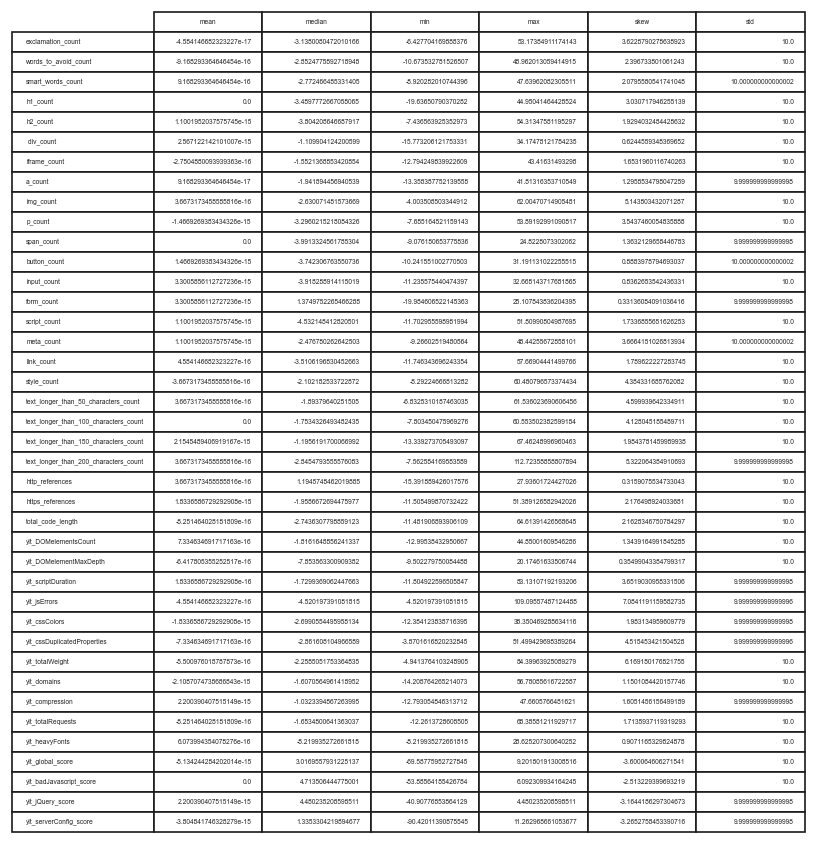

In [60]:
from pandas.plotting import table
plt.figure(dpi=120)
ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
table(ax,df_opis,rowLabels=['']*df_opis.shape[0], loc='center')

In [61]:
df = outliners_df.copy()
df.corrwith(labels)

exclamation_count                       -0.034741
words_to_avoid_count                    -0.012765
smart_words_count                        0.052814
h1_count                                -0.116347
h2_count                                -0.026229
 div_count                               0.192305
iframe_count                             0.043106
a_count                                  0.046248
img_count                                0.113300
p_count                                  0.176366
span_count                               0.338460
button_count                            -0.073856
input_count                             -0.199617
form_count                              -0.183844
script_count                             0.026158
meta_count                              -0.163281
link_count                              -0.286342
style_count                              0.057093
text_longer_than_50_characters_count     0.050381
text_longer_than_100_characters_count    0.050005


Text(0.5, 1.0, 'Macierz korelacji cech z wynikiem')

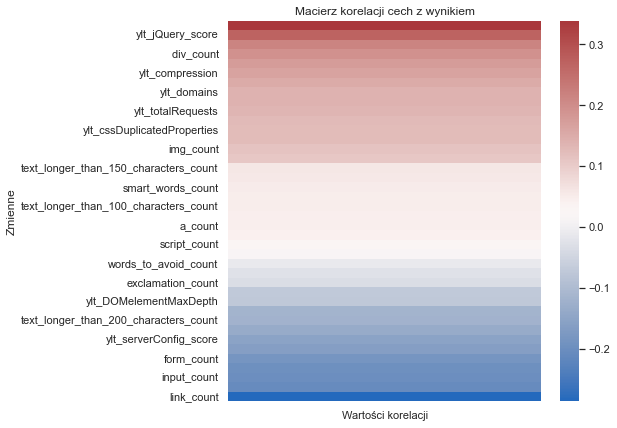

In [62]:
corr = df.corrwith(labels)
corr.sort_values(inplace = True)
corr = pd.DataFrame({'Zmienne':corr.index, 'Wartości korelacji':corr.values})
corr.set_index('Zmienne', inplace=True)
plt.tight_layout()
sns.set(rc = {'figure.figsize':(7,7)})
sns.heatmap(corr, cmap='vlag').invert_yaxis()
plt.title("Macierz korelacji cech z wynikiem")

In [63]:
corr_edge_bottom = corr[:10].index.tolist()
corr_edge_top = corr[-10:].index.tolist()
corr_edges_combined = corr_edge_bottom[:5] + corr_edge_top[-5:]
print(corr_edges_combined)

['link_count', 'ylt_global_score', 'input_count', 'total_code_length', 'form_count', 'p_count', ' div_count', 'ylt_totalWeight', 'ylt_jQuery_score', 'span_count']


Text(0.5, 1.0, 'Macierz korelacji pomiędzy cechami z najbardziej ujemnymi korelacjami z wynikiem')

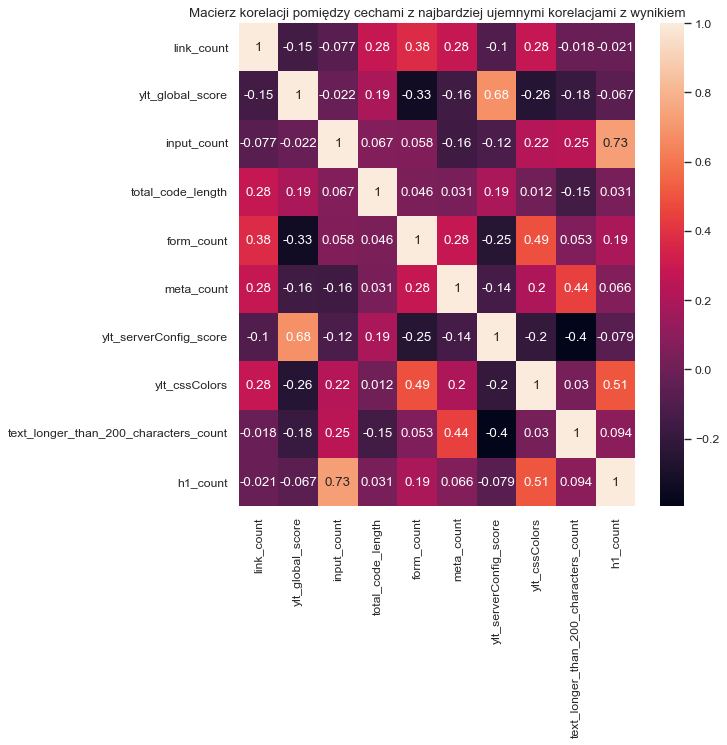

In [64]:
plt.figure(figsize=(8,8),dpi = 80)
sns.heatmap(df[corr_edge_bottom].corr(),annot = df[corr_edge_bottom].corr())
plt.title("Macierz korelacji pomiędzy cechami z najbardziej ujemnymi korelacjami z wynikiem")
#plt.savefig('graphs/bot_10_corr.png', bbox_inches = 'tight')

Text(0.5, 1.0, 'Macierz korelacji pomiędzy cechami z najbardziej dodatnimi korelacjami z wynikiem')

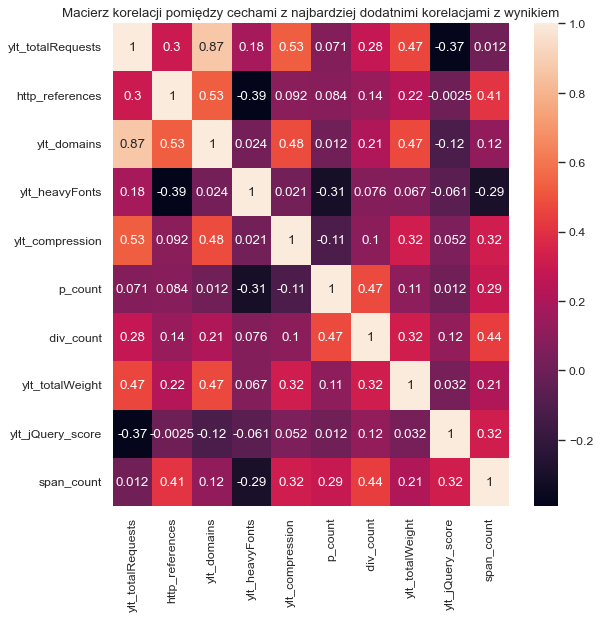

In [65]:
plt.figure(figsize=(8,8),dpi = 80)
sns.heatmap(df[corr_edge_top].corr(),annot = df[corr_edge_top].corr())
plt.title("Macierz korelacji pomiędzy cechami z najbardziej dodatnimi korelacjami z wynikiem")
#plt.savefig('graphs/top_10_corr.png', bbox_inches = 'tight')

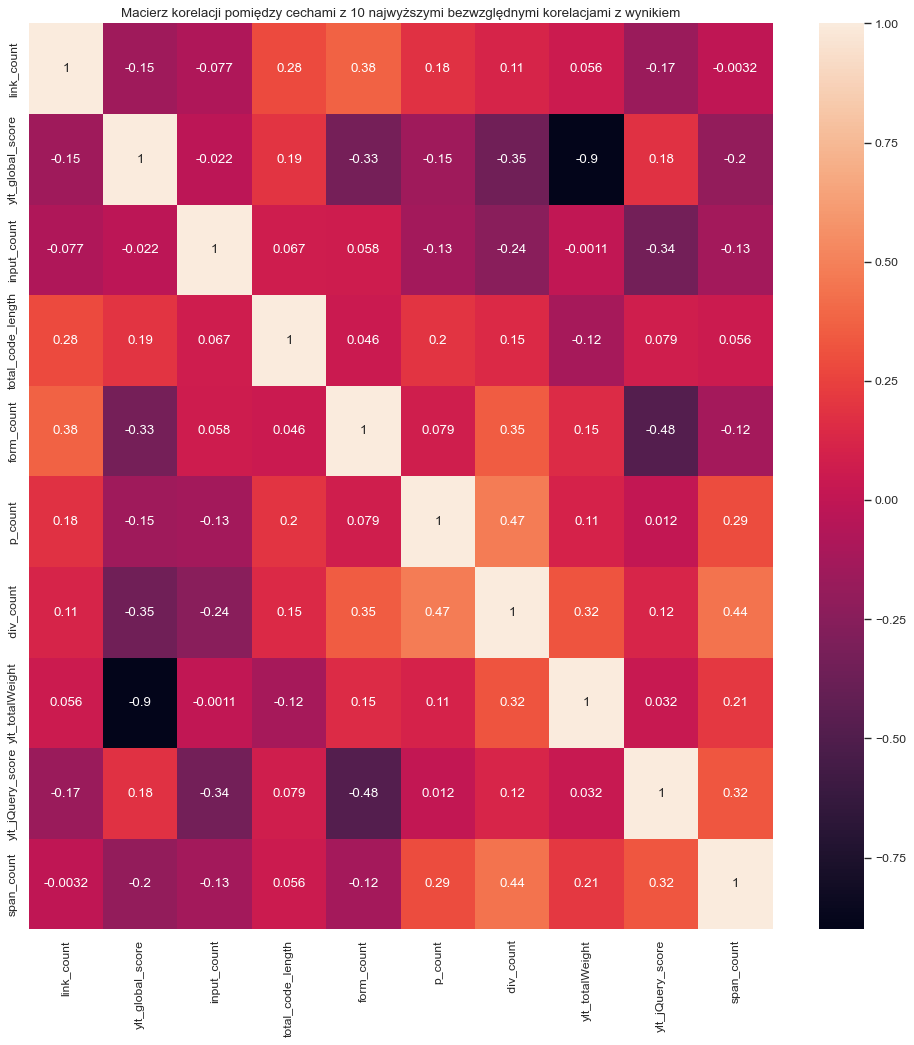

In [66]:
plt.figure(figsize=(15,15),dpi = 80)
sns.heatmap(df[corr_edges_combined].corr(),annot = df[corr_edges_combined].corr())
plt.title("Macierz korelacji pomiędzy cechami z 10 najwyższymi bezwzględnymi korelacjami z wynikiem")
plt.savefig('graphs/edges_10_corr.png', bbox_inches = 'tight')

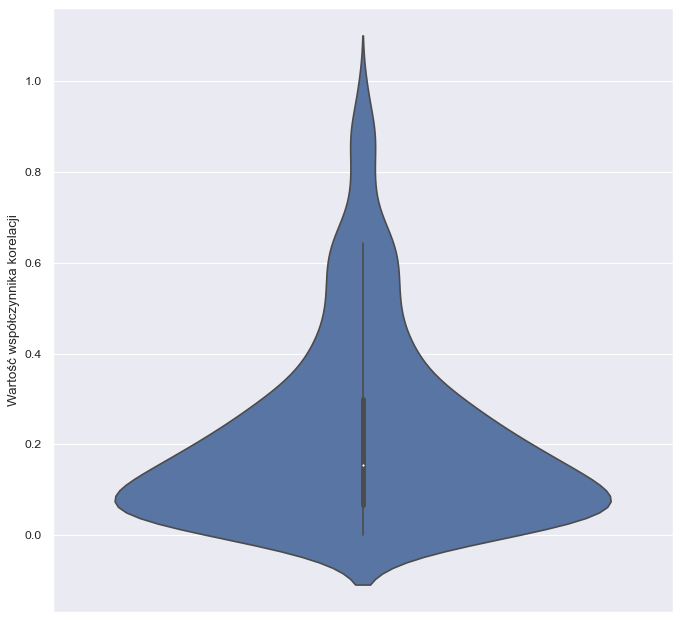

In [68]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_abs_correlations(df):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr

df_copy = df.copy()
abs_corrs = get_abs_correlations(df_copy)
abs_corrs.index = abs_corrs.index.map('_x_'.join)
plt.figure(figsize=(10,10),dpi = 80)
plt.ylabel('Wartość współczynnika korelacji')

sns.violinplot(y=abs_corrs.values)
plt.savefig('graphs\corr_violinplot.png')

In [144]:
dataframe = pd.read_csv('resources/websites_full.csv', delimiter=',', index_col=0).set_index('url')

fake = pd.read_csv('resources/training_data/not_that_legit.txt', names=["url"])
true = pd.read_csv('resources/training_data/legit.txt', names=["url"])
fake['label'] = 1
true['label'] = 0
fake = fake.append(true)
fake = fake.sort_values(by=['url'], ignore_index=True)
labels = fake['label']
fake = fake.set_index('url')
df_final = dataframe.merge(fake, left_on='url', right_on='url')

outliners_df = df_final.copy()
outliners_df.reset_index(inplace=True)
outliners_df.drop('url', axis=1, inplace=True)
#outliners_df = outliners_df[(np.abs(stats.zscore(outliners_df)) < 6).all(axis=1)]	
labels_copy = outliners_df['label']
outliners_df['https_references'] = outliners_df['https_references']/1000.
outliners_df['ylt_totalWeight'] = outliners_df['ylt_totalWeight']/10000.
outliners_df['ylt_compression'] = outliners_df['ylt_compression']/100.
outliners_df['ylt_heavyFonts'] = outliners_df['ylt_heavyFonts']**(1./2.)
outliners_df=(outliners_df-outliners_df.mean())/outliners_df.std()
outliners_df=(outliners_df-outliners_df.min())/(outliners_df.max()-outliners_df.min())
outliners_df['label'] = labels_copy
outliners_df['all'] = ''
df_final = outliners_df.copy()
df_final

,exclamation_count,words_to_avoid_count,smart_words_count,h1_count,h2_count,div_count,iframe_count,a_count,img_count,p_count,...,ylt_domains,ylt_compression,ylt_totalRequests,ylt_heavyFonts,ylt_global_score,ylt_badJavascript_score,ylt_jQuery_score,ylt_serverConfig_score,label,all
0,0.035714,0.101351,0.304348,0.055556,0.004464,0.080600,0.16,0.238589,0.004957,0.025896,...,0.192893,0.547424,0.167951,0.312364,0.831915,0.986111,0.94,0.853659,0,
1,0.006494,0.074324,0.000000,0.055556,0.000000,0.035596,0.12,0.215768,0.007435,0.000000,...,0.192893,0.548359,0.161787,0.333932,0.844681,0.986111,0.94,0.858537,0,
2,0.019481,0.060811,0.304348,0.055556,0.008929,0.084160,0.16,0.234440,0.006196,0.026228,...,0.203046,0.715891,0.206471,0.382934,0.851064,0.986111,0.94,0.841463,0,
3,0.029221,0.074324,0.086957,0.055556,0.004464,0.057208,0.12,0.218880,0.016109,0.001992,...,0.208122,0.710889,0.195686,0.312364,0.834043,0.986111,0.94,0.836585,0,
4,0.025974,0.013514,0.021739,0.055556,0.017857,0.044750,0.04,0.061203,0.017348,0.063745,...,0.081218,0.058629,0.041602,0.603270,0.978723,1.000000,1.00,0.924390,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,0.490260,0.148649,0.043478,0.166667,0.035714,0.031020,0.80,0.081950,0.044610,0.022908,...,0.279188,0.202398,0.360555,0.263504,0.840426,0.629630,0.40,0.804878,1,
333,0.360390,0.121622,0.000000,0.166667,0.008929,0.031020,0.84,0.070539,0.044610,0.021580,...,0.314721,0.287305,0.385208,0.263504,0.827660,0.629630,0.40,0.807317,1,
334,0.448052,0.020270,0.130435,0.222222,0.008929,0.031782,0.80,0.071577,0.044610,0.023240,...,0.284264,0.283690,0.360555,0.263504,0.840426,0.629630,0.40,0.807317,1,
335,0.347403,0.067568,0.021739,0.166667,0.008929,0.031020,0.72,0.075726,0.044610,0.022908,...,0.309645,0.338169,0.391371,0.263504,0.840426,0.629630,0.40,0.782927,1,


In [145]:
df_final.describe()

,exclamation_count,words_to_avoid_count,smart_words_count,h1_count,h2_count,div_count,iframe_count,a_count,img_count,p_count,...,ylt_totalWeight,ylt_domains,ylt_compression,ylt_totalRequests,ylt_heavyFonts,ylt_global_score,ylt_badJavascript_score,ylt_jQuery_score,ylt_serverConfig_score,label
count,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,...,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000
mean,0.110428,0.153461,0.163979,0.075008,0.030853,0.063209,0.236558,0.148999,0.062701,0.045545,...,0.038932,0.183223,0.230227,0.151468,0.221792,0.914900,0.902379,0.941068,0.886792,0.442136
std,0.171529,0.150988,0.186652,0.088709,0.065913,0.066501,0.189969,0.119604,0.154827,0.075494,...,0.091768,0.150415,0.179404,0.145425,0.269373,0.107098,0.163693,0.137456,0.124535,0.497379
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.035714,0.067568,0.043478,0.055556,0.000000,0.029748,0.120000,0.071577,0.013631,0.014276,...,0.010783,0.071066,0.088672,0.053929,0.000000,0.895745,0.921296,0.940000,0.865854,0.000000
50%,0.055195,0.108108,0.108696,0.055556,0.013393,0.053903,0.200000,0.123444,0.021066,0.023240,...,0.018642,0.152284,0.202185,0.126348,0.000000,0.946809,0.976852,1.000000,0.902439,0.000000
75%,0.094156,0.175676,0.195652,0.055556,0.035714,0.082888,0.320000,0.212656,0.049566,0.050465,...,0.033941,0.263959,0.300213,0.183359,0.423483,0.974468,0.995370,1.000000,0.956098,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


C:\Users\mwojcik\AppData\Local\Temp/ipykernel_14436/3009955866.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,10),dpi = 80)


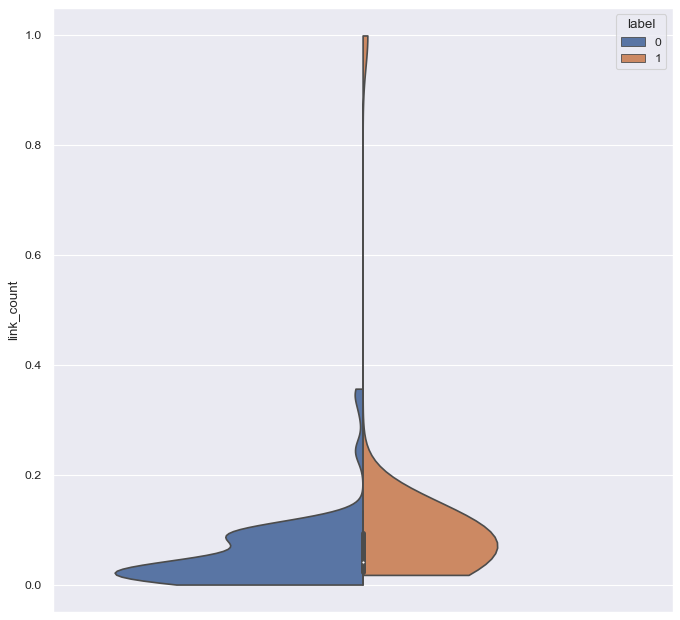

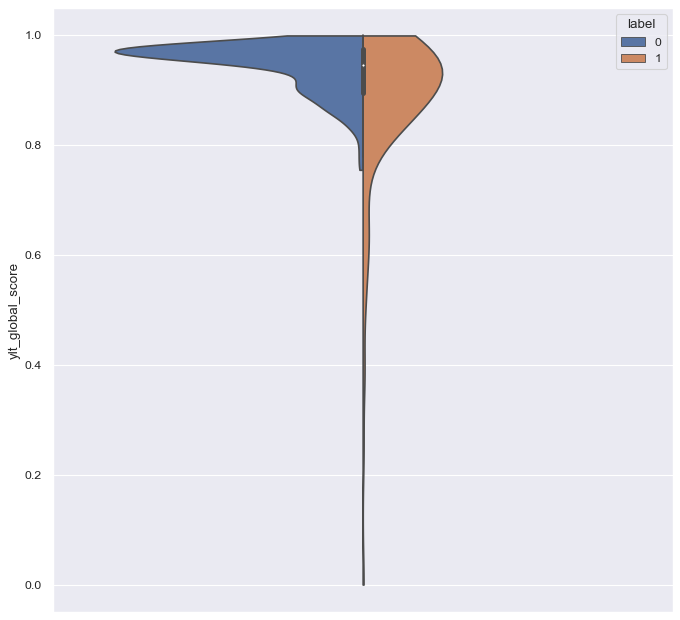

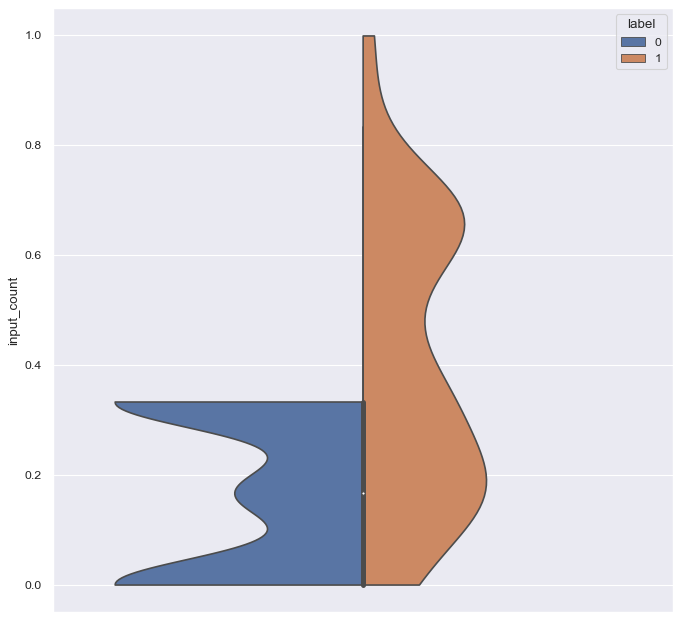

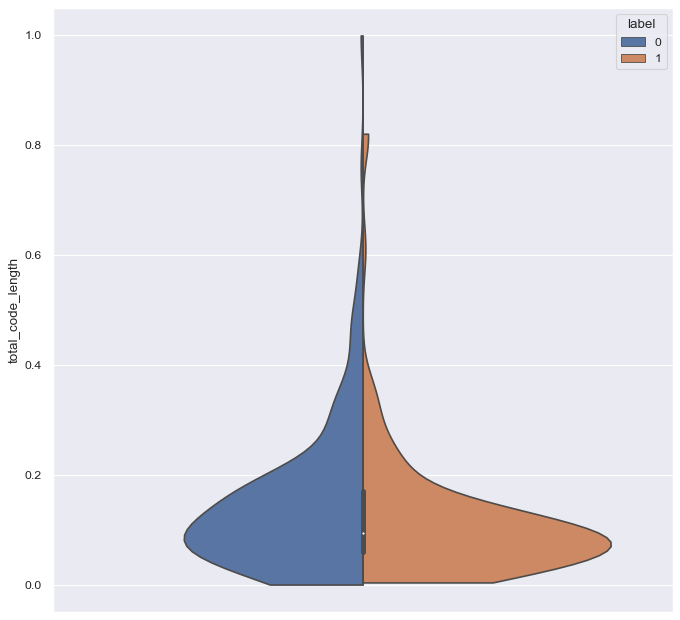

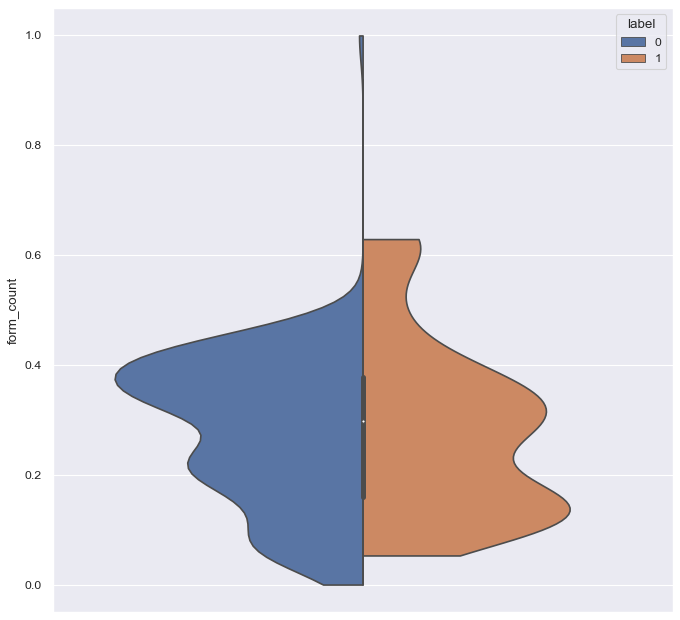

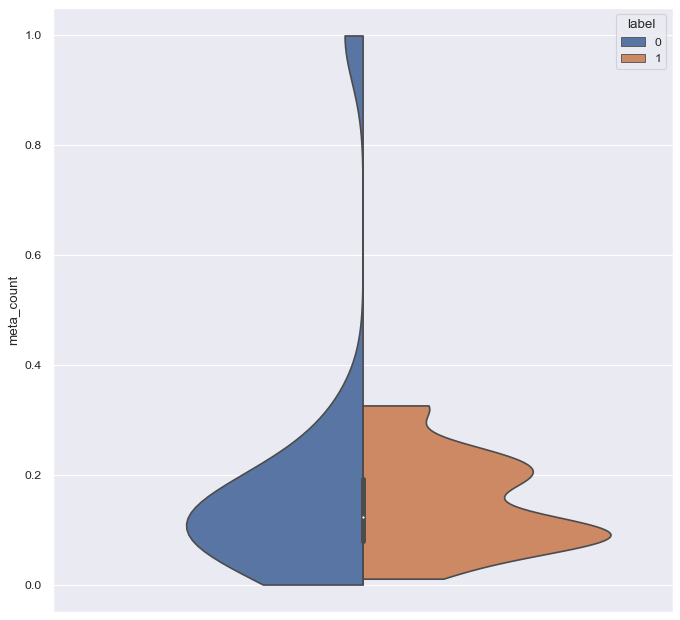

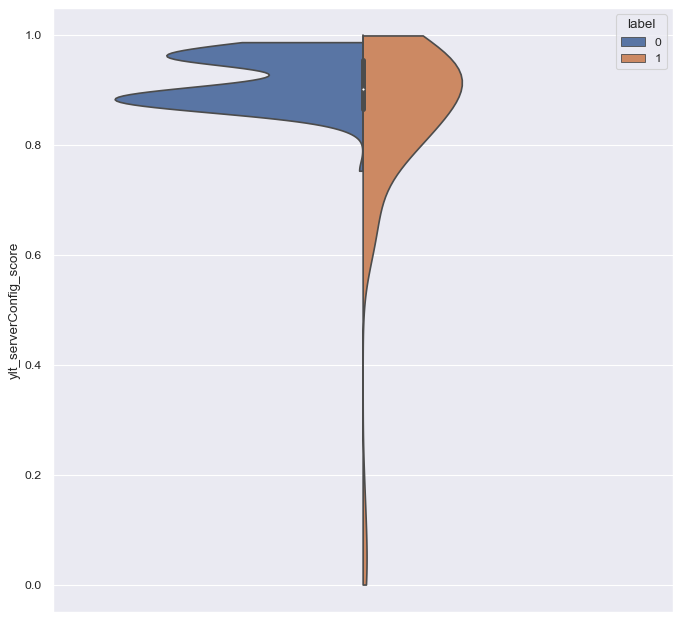

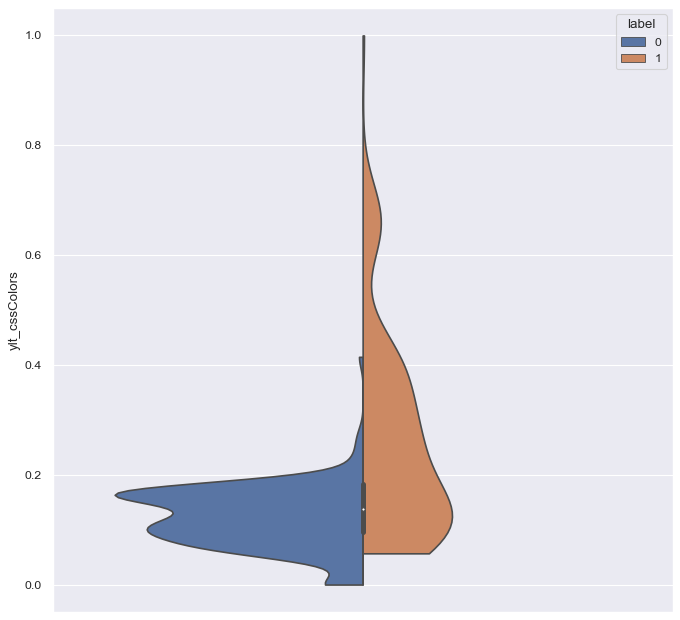

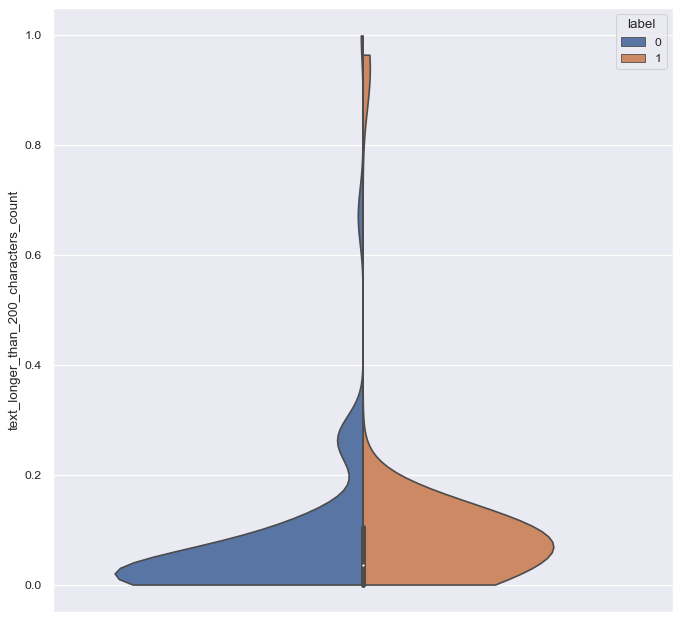

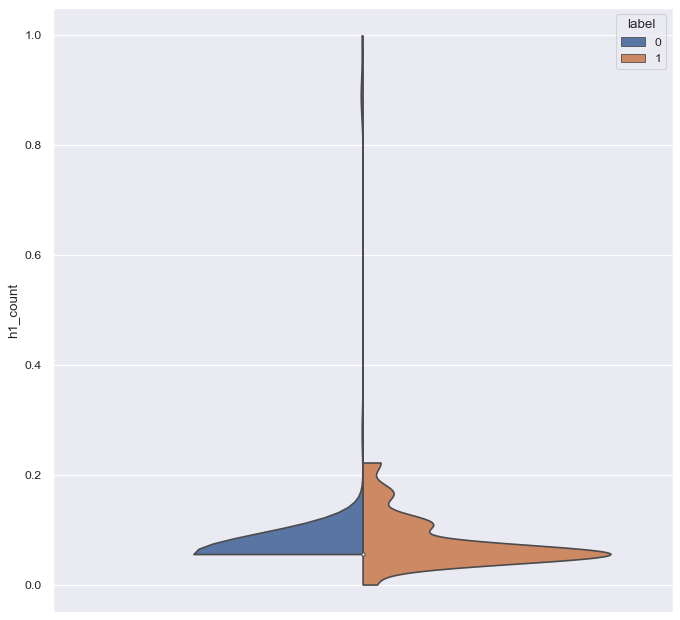

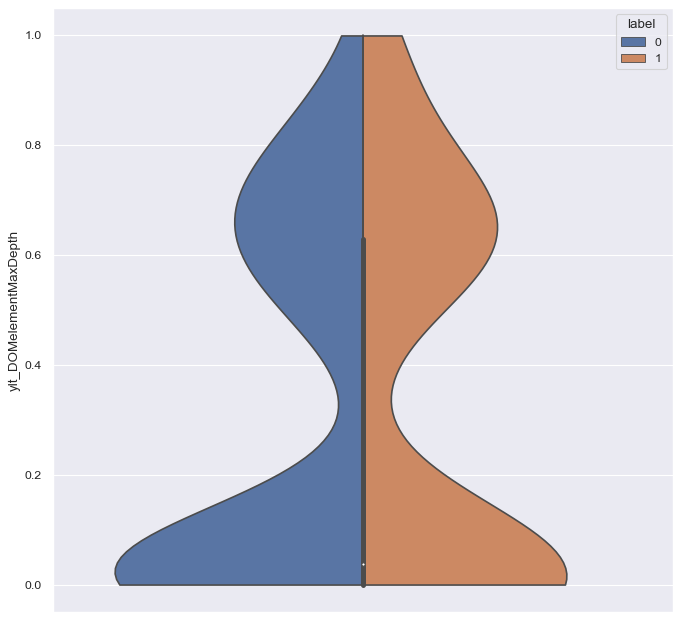

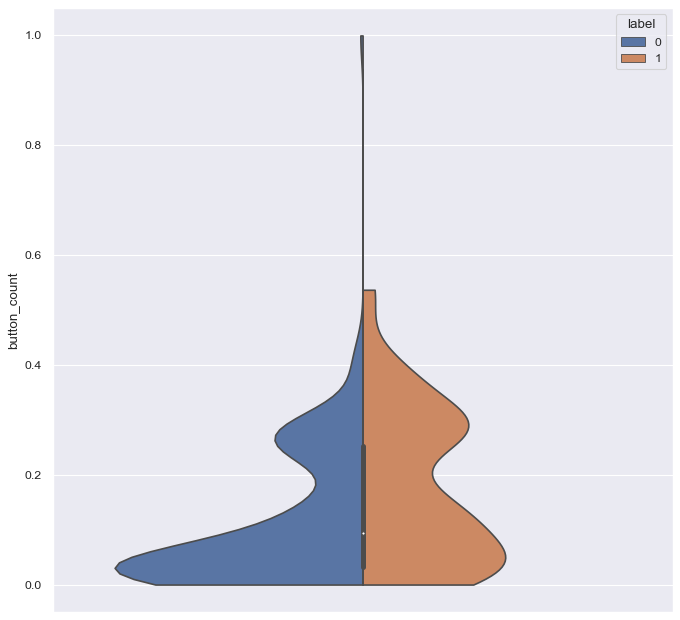

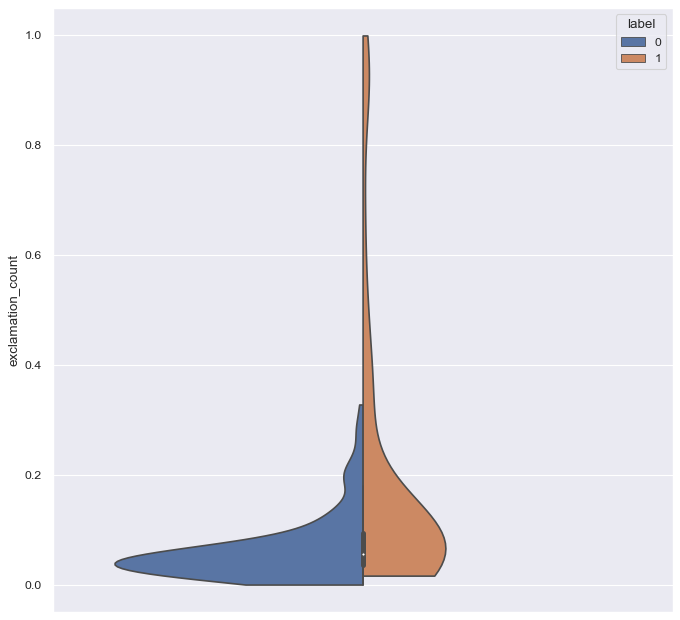

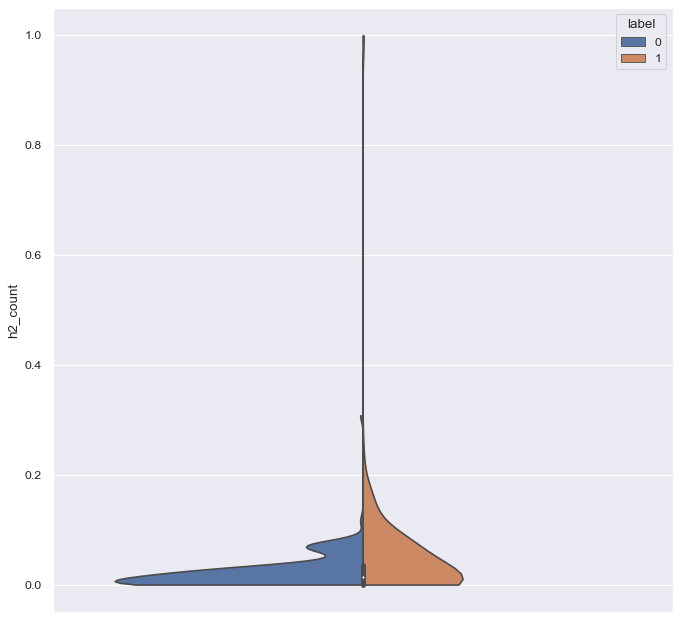

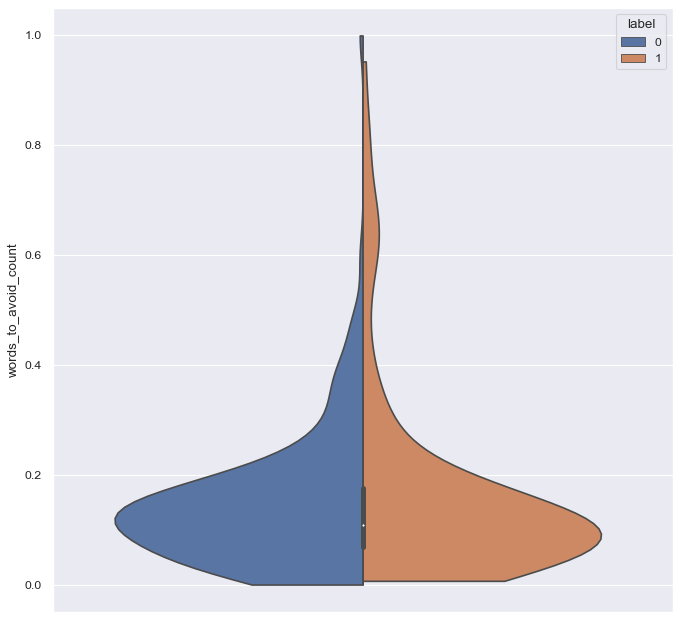

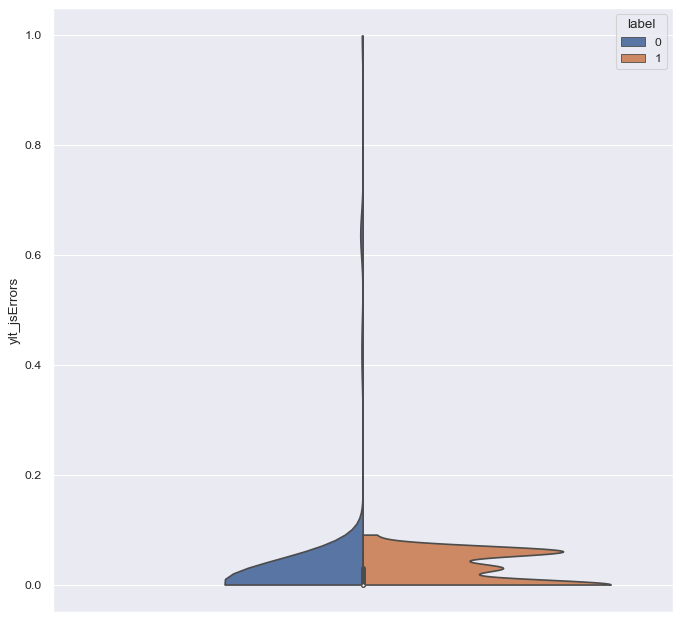

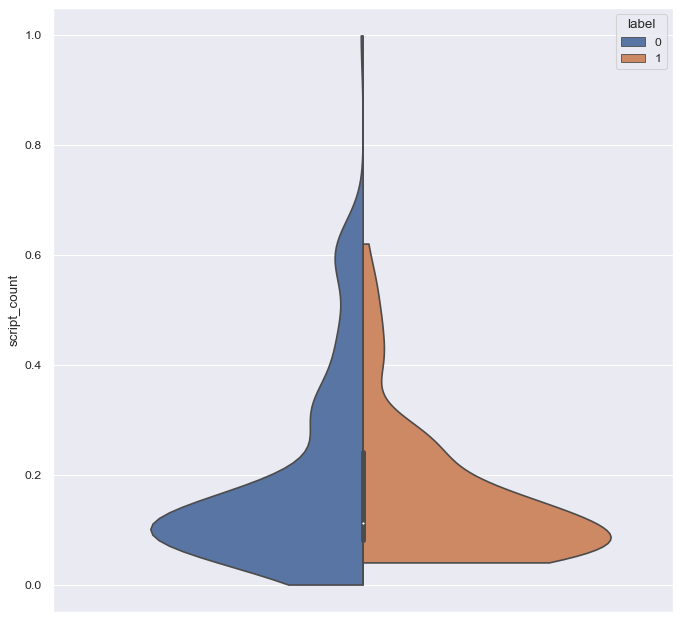

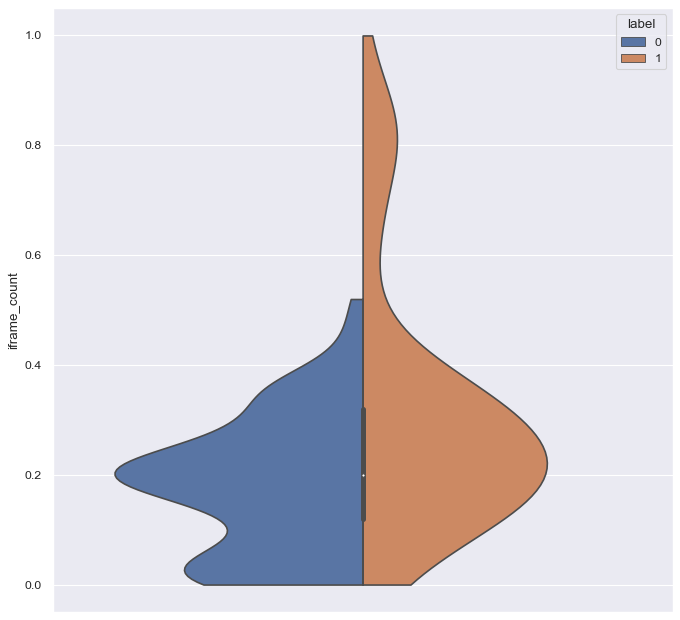

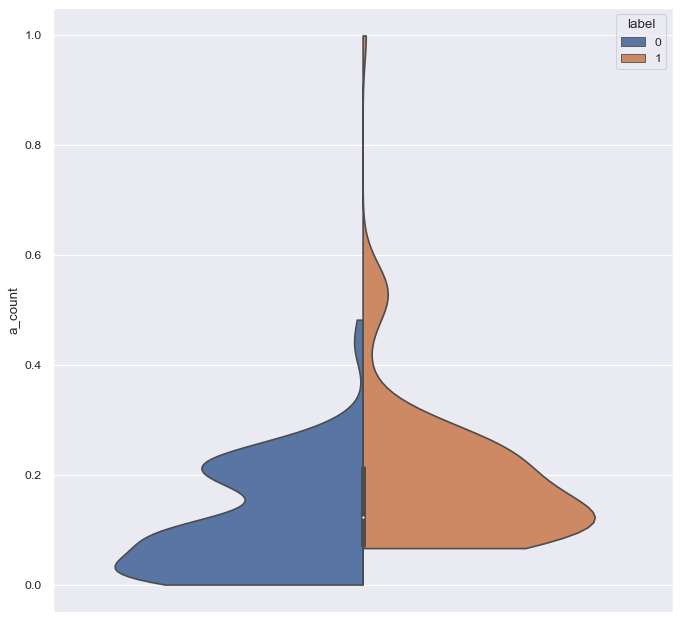

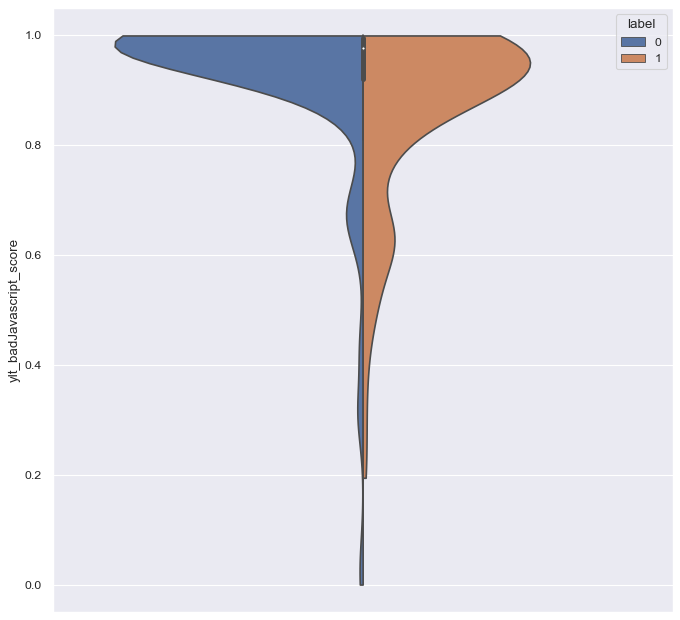

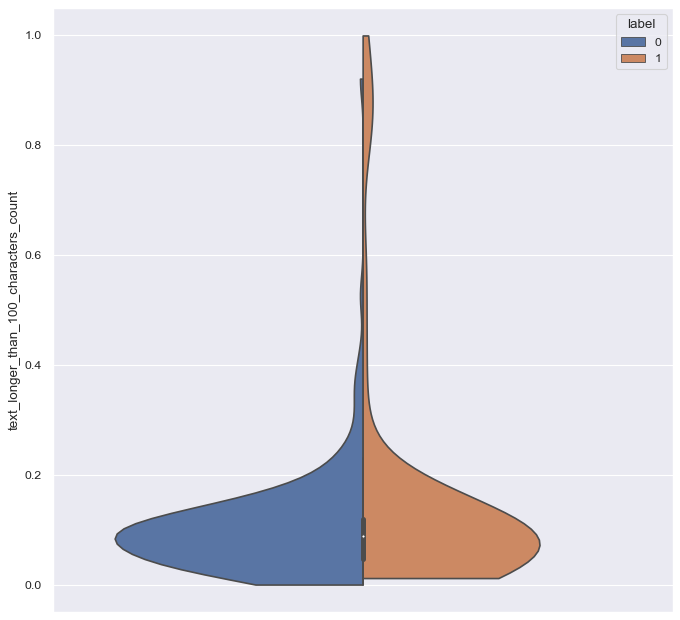

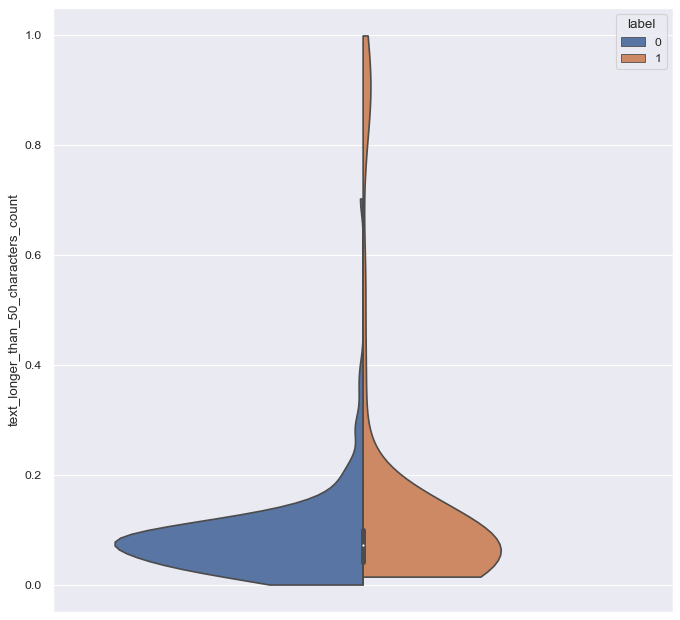

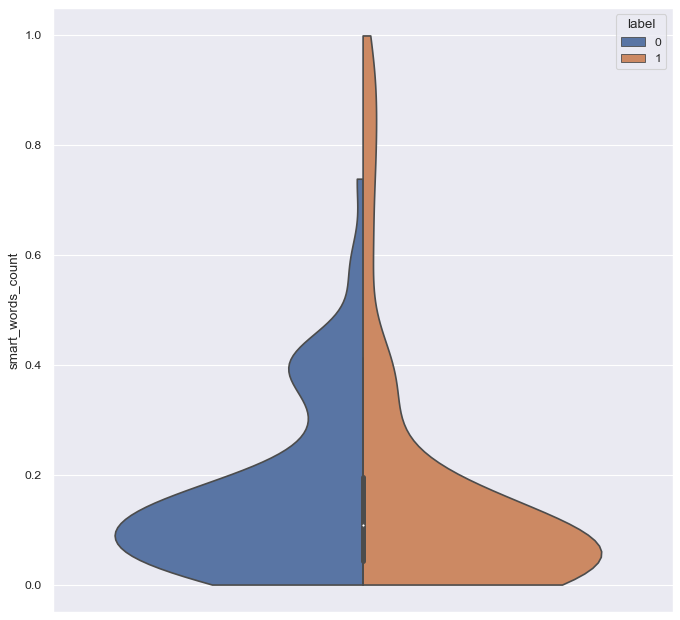

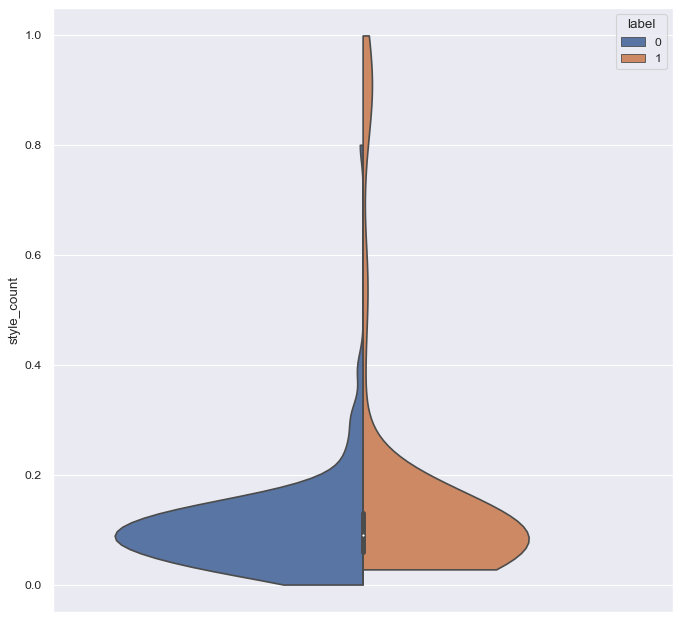

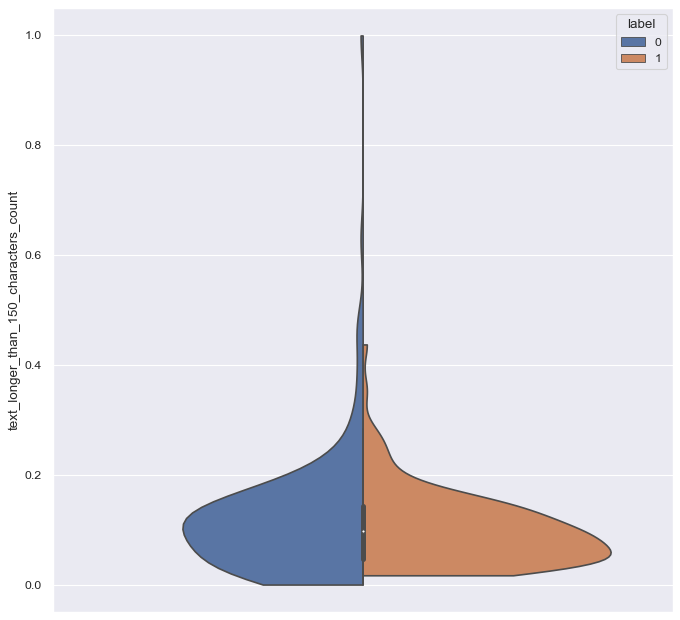

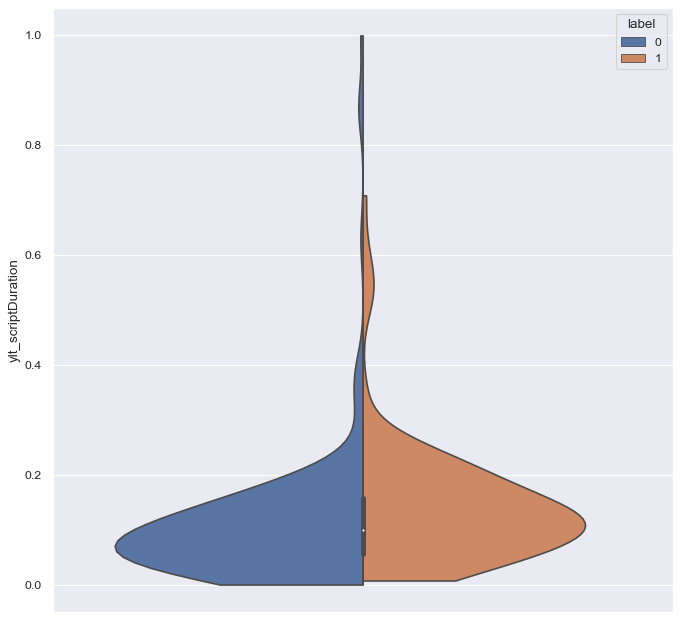

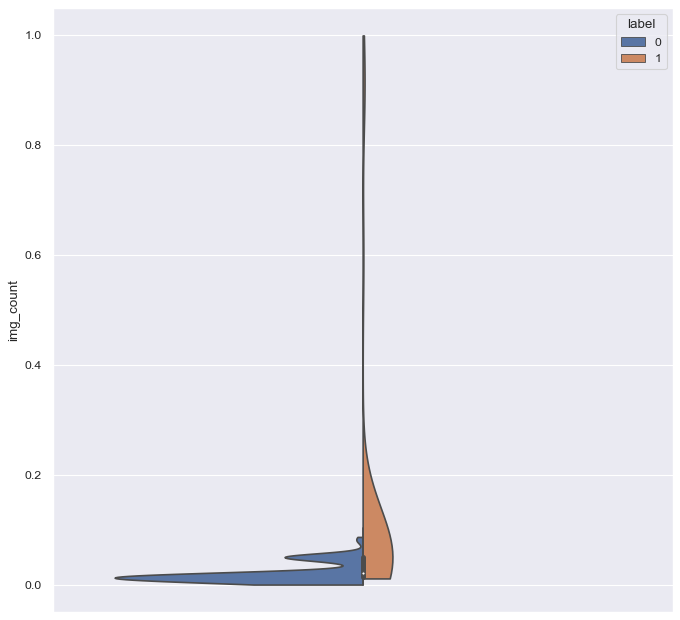

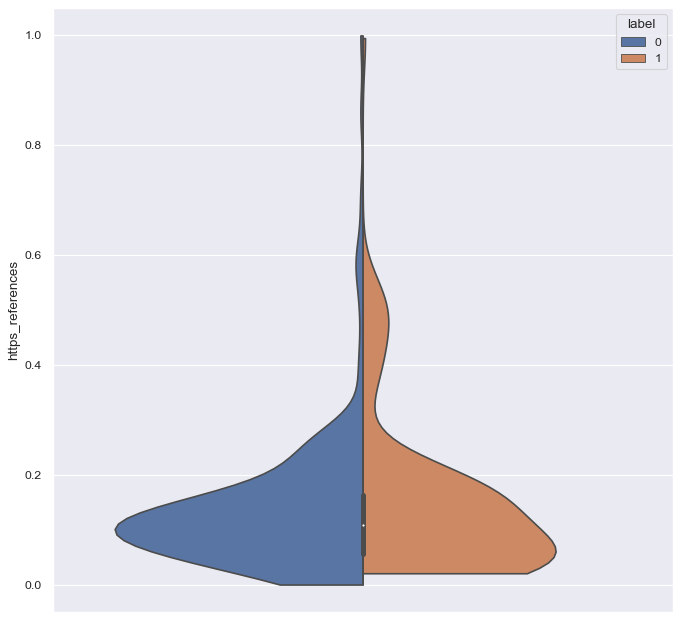

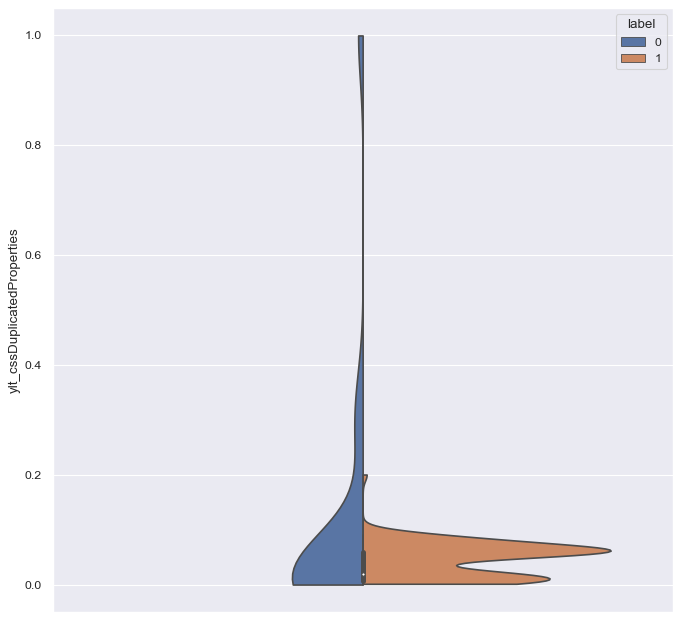

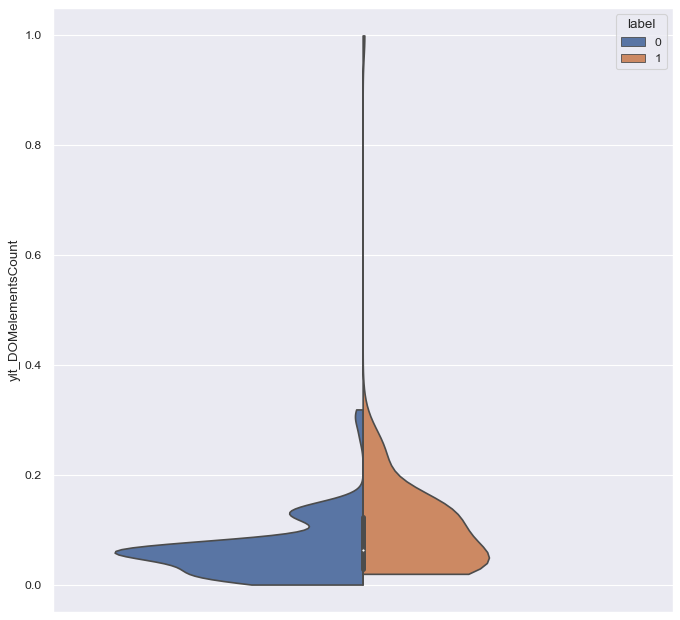

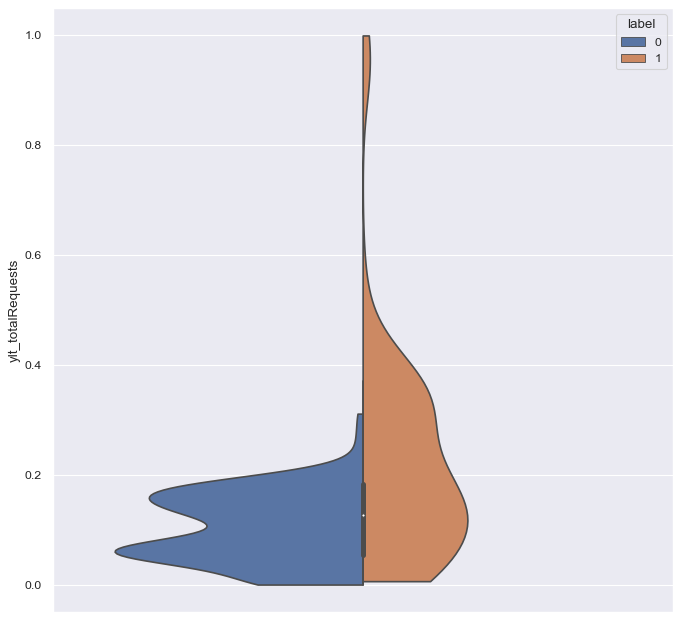

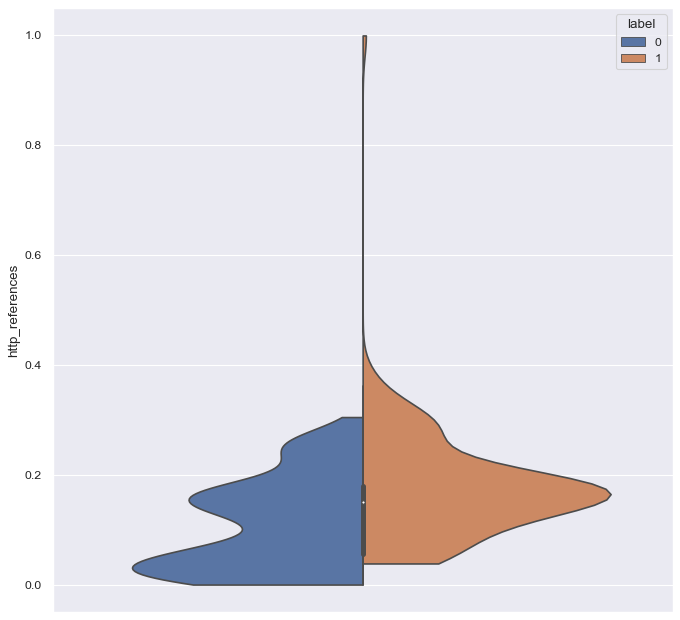

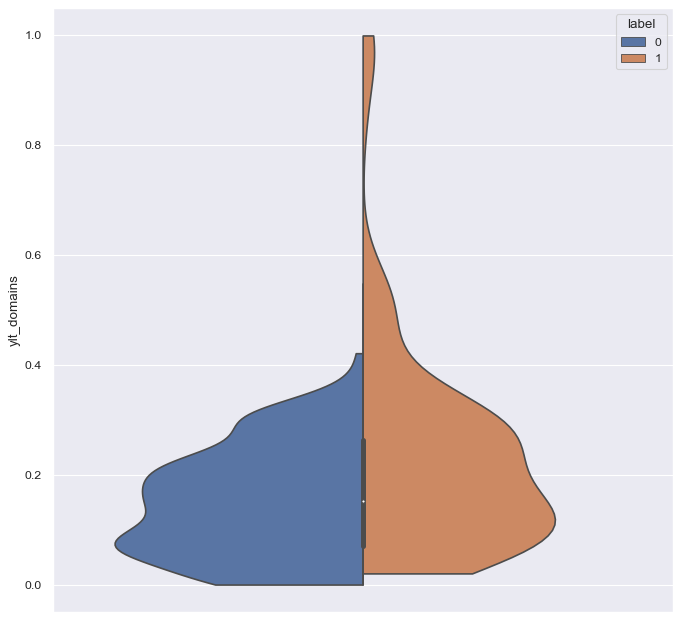

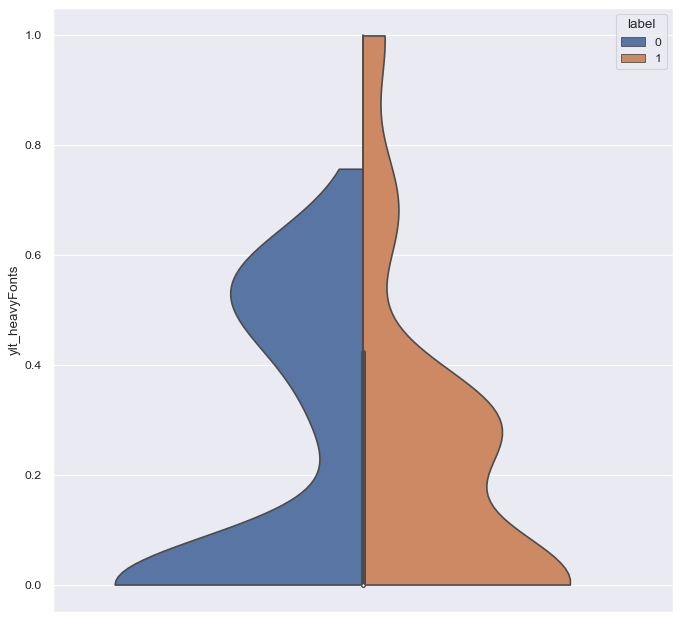

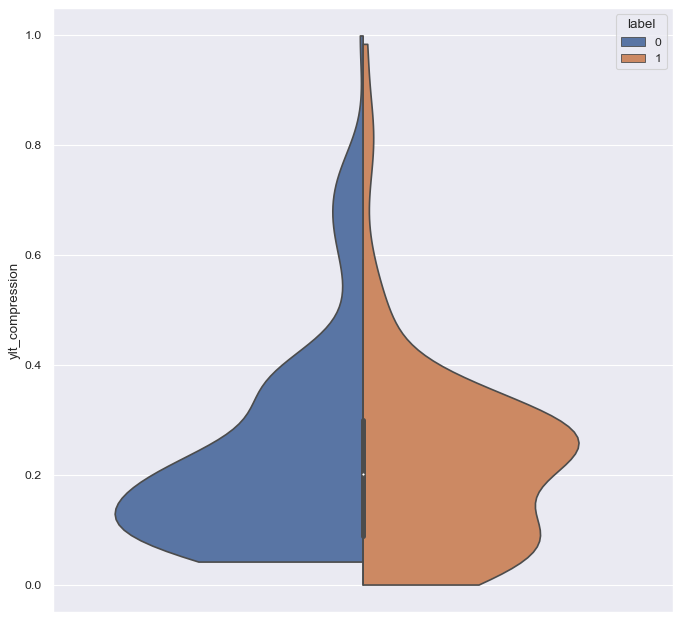

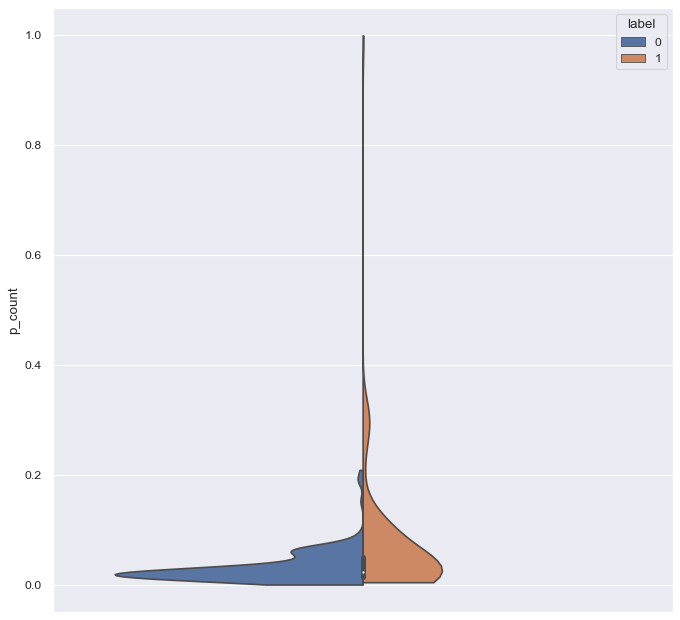

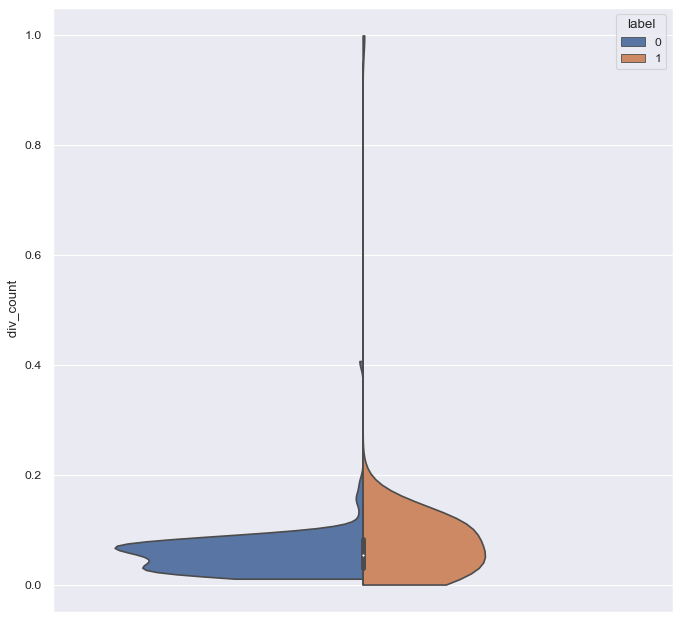

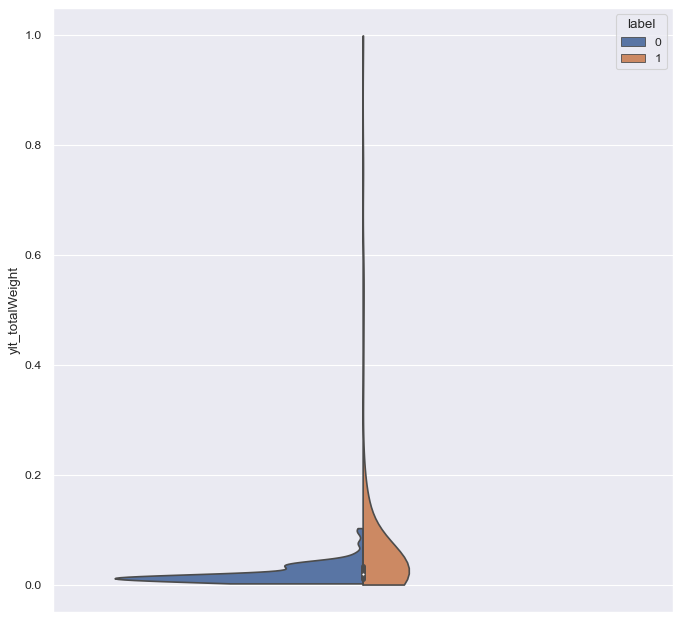

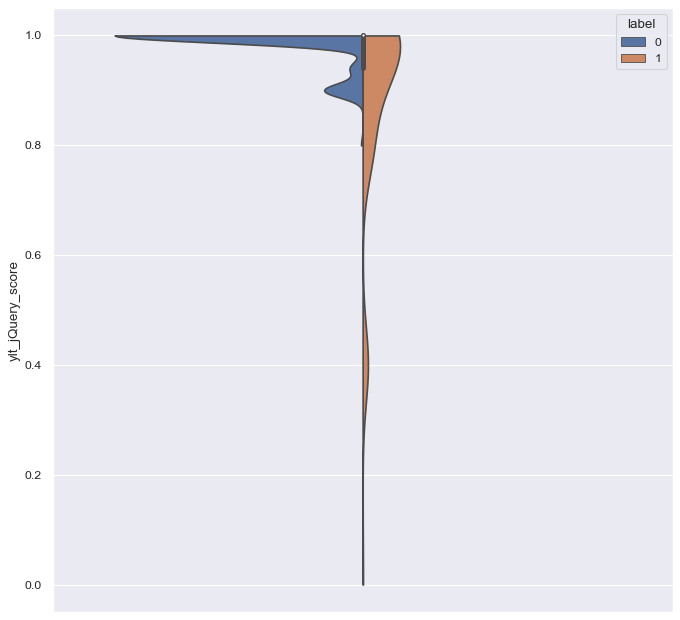

In [147]:
edges = corr.index.tolist()
for col in edges[:-1]:
    plt.figure(figsize=(10,10),dpi = 80)
    a = sns.violinplot(data=df_final,y=col, x='all', hue='label', split=True, cut=0)
    a.set_xlabel("")
    plt.savefig('graphs\\violins\dist_violinplot_split_' + col + '.png')

<Figure size 504x504 with 0 Axes>

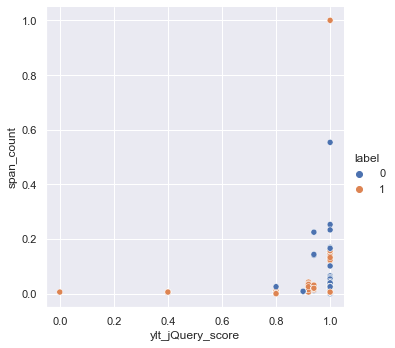

In [156]:
i = 0
for col1 in corr.index:
    i += 1
    for col2 in corr.index[i:]:
        if (col1!=col2):
            plt.close('all')
            plt.figure()
            sns.relplot(x=col1, y=col2, hue='label', data=df_final)
            plt.savefig('graphs\\relplots\\dist_boxplot_' + col1 + '_x_' + col2 + '.png')
            
    

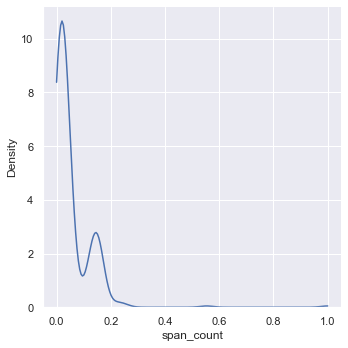

In [160]:
for col in corr.index:
    plt.close('all')
    sns.displot(df_final[col], kind="kde", cut=0)
    plt.savefig('graphs\\distribution_before\\dist_' + col + '.png')

In [162]:
df_copy = df_final.drop(['all'], axis=1)
for col in df_copy.columns:
    if (df_copy[col].skew()>1):
        df_copy[col] = df_copy[col] ** (1./3.)
    elif (df_copy[col].skew()<-1):
        df_copy[col] = df_copy[col] ** 3.
        
df_opis = pd.DataFrame()
df_opis.loc[:,'mean'] = df_copy.mean(numeric_only=True)
df_opis.loc[:,'median'] = df_copy.median(numeric_only=True)
df_opis.loc[:,'min'] = df_copy.min()
df_opis.loc[:,'max'] = df_copy.max()
df_opis.loc[:,'skew'] = df_copy.skew()
latex = df_opis.to_latex()
with open("Opis_latex_zmiana.txt", "w") as text_file:
    text_file.write(latex)

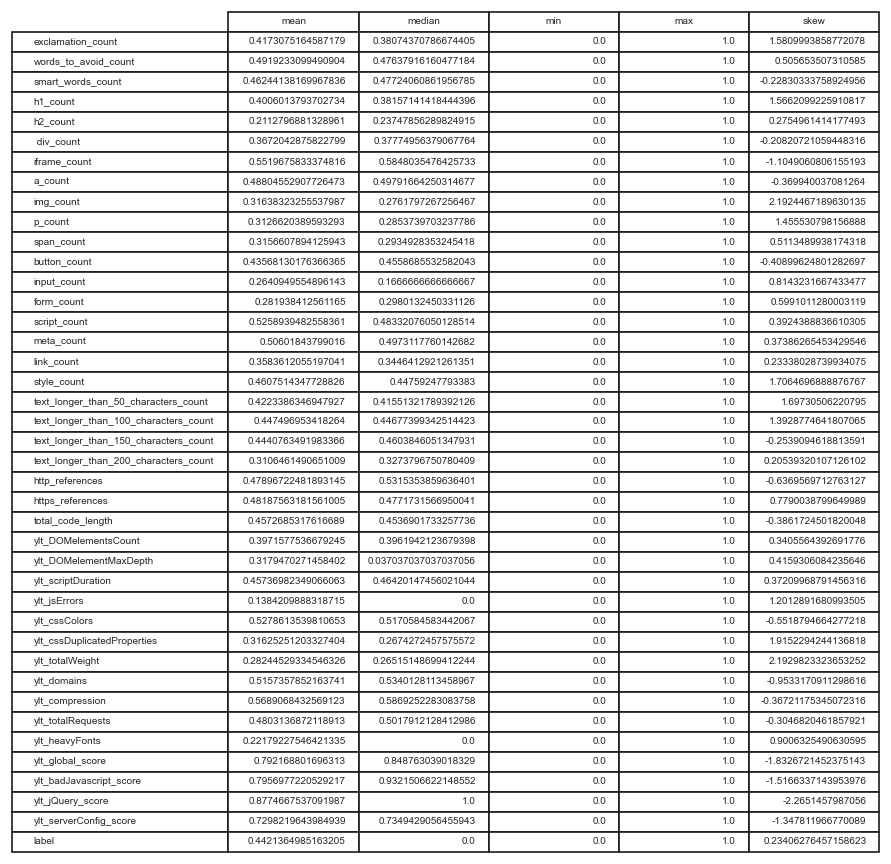

In [163]:
plt.figure(dpi=120)
ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
table(ax,df_opis,rowLabels=['']*df_opis.shape[0], loc='center')

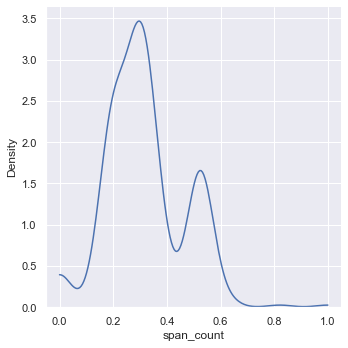

In [164]:
for col in corr.index:
    plt.close('all')
    sns.displot(df_copy[col], kind="kde", cut=0)
    plt.savefig('graphs\\distribution_after\\dist_' + col + '.png')

In [166]:
df_copy.to_csv('resources\websites_after_changes.csv')